# Standardization or Z-Score Normalization

$$x'_i = \frac{x_i - \bar{x}}{\sigma}$$

Where,

- $\bar{x}$: mean
- $\sigma$: standard deviation

**After the standardization, the mean($\bar{x}$) will be zero (0) and standard deviation ($\sigma$) will be 1**

## Load Dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Datasets/Social Networking/train.csv", usecols = ["Age", "EstimatedSalary", "Purchased"])
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1), df["Purchased"], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [12]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

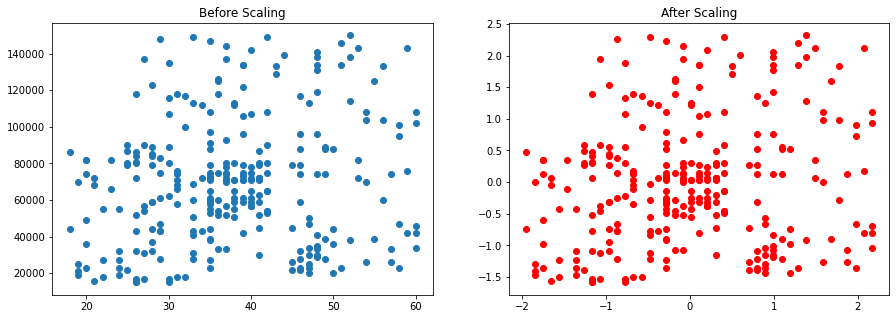

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title("After Scaling")

plt.show()

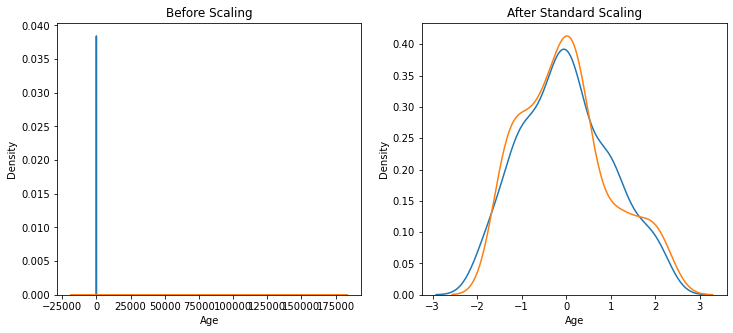

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax = ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax = ax1)

# after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax = ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax = ax2)

plt.show()

## Comparison of Distributions

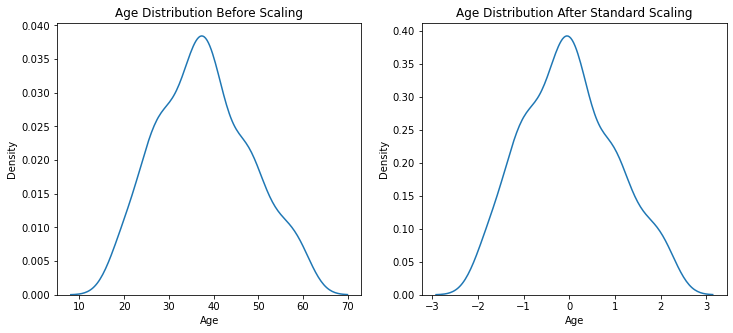

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

# before scaling
sns.kdeplot(X_train["Age"], ax = ax1)
ax1.set_title("Age Distribution Before Scaling")

# after scaling
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
ax2.set_title("Age Distribution After Standard Scaling")

plt.show()

## Why scaling is important?

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [18]:
lr.fit(X_train, y_train)

lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [20]:
from sklearn.metrics import accuracy_score

print(f"Actual: {accuracy_score(y_test, y_pred)}")
print(f"Actual: {accuracy_score(y_test, y_pred_scaled)}")

Actual: 0.6583333333333333
Actual: 0.8666666666666667


## Effect of Outliers

In [21]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [23]:
df = df.append(pd.DataFrame({"Age": [5, 90, 95], "EstimatedSalary": [1000, 250000, 350000], "Purchased": [0, 1, 1]}))
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
0,5,1000,0
1,90,250000,1


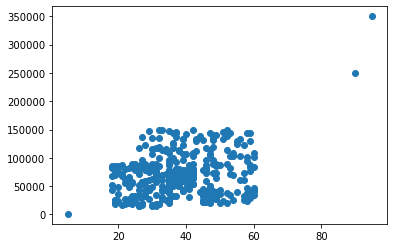

In [24]:
plt.scatter(df["Age"], df["EstimatedSalary"])
plt.show()